In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
from dm_tool import data_prep 

%matplotlib inline

In [30]:
X, y = data_prep()

C:\Users\kmw41\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41432 entries, 0 to 41475
Data columns (total 23 columns):
Auction                              41432 non-null object
VehYear                              41432 non-null category
Make                                 41432 non-null object
Color                                41432 non-null object
Transmission                         41432 non-null int64
WheelType                            41432 non-null object
VehOdo                               41432 non-null float64
Nationality                          41432 non-null object
Size                                 41432 non-null object
TopThreeAmericanName                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41432 non-null float64
MMRAcquisitionAuctionCleanPrice      41432 non-null float64
MMRAcquisitionRetailAveragePrice     41432 non-null float64
MMRAcquisitonRetailCleanPrice        41432 non-null float64
MMRCurrentAuctionAveragePrice        41432 non-null float64

### Splitting the dataset 

In [31]:
# setting random state
# .as_matrix removed replaced with .values
# train test 70 / 30 percent
rs = 10
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.30, stratify=y, random_state=rs)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

C:\Users\kmw41\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### Model construction and evaluation

In [32]:
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# decision tree evaluation
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# Confusion Matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

print("\n\n*********** Feature Importances ************\n")   
for i in indices:
    print(f"{feature_names[i]:<35}:{importances[i]}")

Train accuracy: 1.0
Test accuracy: 0.7430879155017086
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1609
           1       0.74      0.74      0.74      1610

   micro avg       0.74      0.74      0.74      3219
   macro avg       0.74      0.74      0.74      3219
weighted avg       0.74      0.74      0.74      3219



*********** Feature Importances ************

Auction_ADESA                      :0.1995101601994742
MMRCurrentAuctionAveragePrice      :0.08689502227148588
VehOdo                             :0.055604154360218365
VehBCost                           :0.05538934621533245
MMRCurrentRetailRatio              :0.03981649521430139
VNST_OK                            :0.036412515793597014
MMRCurrentRetailCleanPrice         :0.03201626794904837
WarrantyCost                       :0.03078806439276344
MMRAcquisitionAuctionCleanPrice    :0.028899555397435737
MMRAcquisitionRetailAveragePrice   :0.028746623186930085
VNST_CO 

#### Another Decition Tree model 

In [33]:
#retrain with a small max_depth limit 3
model_2 = DecisionTreeClassifier(max_depth=3, random_state=rs, )
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.7441086406603648
Test accuracy: 0.7418452935694315
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1609
           1       0.80      0.65      0.72      1610

   micro avg       0.74      0.74      0.74      3219
   macro avg       0.75      0.74      0.74      3219
weighted avg       0.75      0.74      0.74      3219



In [34]:
#retrain with a small max_depth limit 4
model_3 = DecisionTreeClassifier(max_depth=4, random_state=rs, criterion='entropy',)
model_3.fit(X_train, y_train)

print("Train accuracy:", model_3.score(X_train, y_train))
print("Test accuracy:", model_3.score(X_test, y_test))

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

#max_depth 4.8 maximal optimum

# grab feature importances from the model and feature name from the original X
importances = model_3.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]


print("\n\n*********** Feature Importances ************\n")   
for i in indices:
    print(f"{feature_names[i]:<35}:{importances[i]}")

Train accuracy: 0.7540939954733058
Test accuracy: 0.7530288909599254
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1609
           1       0.80      0.67      0.73      1610

   micro avg       0.75      0.75      0.75      3219
   macro avg       0.76      0.75      0.75      3219
weighted avg       0.76      0.75      0.75      3219



*********** Feature Importances ************

Auction_ADESA                      :0.6393264236558694
MMRCurrentAuctionAveragePrice      :0.12713659886786932
VNST_OK                            :0.09553155133038324
VNST_CO                            :0.04485855622790786
VNST_AZ                            :0.03366041621952035
VNST_CA                            :0.030926899326011344
Auction_OTHER                      :0.028559554372438543
Make_INFINITI                      :0.0
Make_HYUNDAI                       :0.0
Make_MINI                          :0.0
Make_HONDA                         :0.0
Mak

In [35]:
# another model with params change
# retrain with a small max_depth limit 4
model_3 = DecisionTreeClassifier(max_depth=4, random_state=rs, criterion = 'gini', splitter='best'  )
model_3.fit(X_train, y_train)

print("Train accuracy:", model_3.score(X_train, y_train))
print("Test accuracy:", model_3.score(X_test, y_test))

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

#max_depth 4 maximal optimum

# grab feature importances from the model and feature name from the original X
importances = model_3.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]


print("\n\n***********  Feature Importances ************\n")   
for i in indices:
    print(f"{feature_names[i]:<35}:{importances[i]}")

Train accuracy: 0.7540939954733058
Test accuracy: 0.7530288909599254
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1609
           1       0.80      0.67      0.73      1610

   micro avg       0.75      0.75      0.75      3219
   macro avg       0.76      0.75      0.75      3219
weighted avg       0.76      0.75      0.75      3219



***********  Feature Importances ************

Auction_ADESA                      :0.6038690878394326
MMRCurrentAuctionAveragePrice      :0.1536919921491218
VNST_OK                            :0.09714194151783924
VNST_CO                            :0.054804938088385755
VNST_AZ                            :0.03426193135146482
Auction_OTHER                      :0.0289828003898018
VehBCost                           :0.027247308663954077
Make_INFINITI                      :0.0
Make_HYUNDAI                       :0.0
Make_ISUZU                         :0.0
Make_MINI                          :0.0
Make

In [36]:
# visualize with graphViz
# refer to png file in your folder
dotfile = StringIO()
export_graphviz(model_3, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("model_3Tree.png") # saved in the following file - will return True if successful

Text(0, 0.5, 'accuracy')

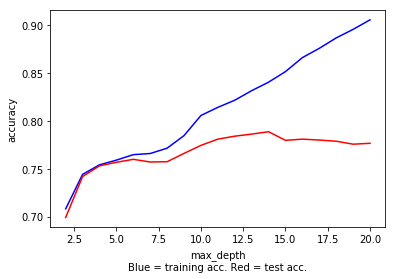

In [37]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))


plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r', )
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')



# At max_depth 5 ovefitting is  evident

#### Task 2.2 Grid Search

In [38]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.75902010384769
Test accuracy: 0.7567567567567568
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1609
           1       0.80      0.68      0.74      1610

   micro avg       0.76      0.76      0.76      3219
   macro avg       0.76      0.76      0.76      3219
weighted avg       0.76      0.76      0.76      3219

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}


In [39]:
# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(20, 35)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.75902010384769
Test accuracy: 0.7567567567567568
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1609
           1       0.80      0.68      0.74      1610

   micro avg       0.76      0.76      0.76      3219
   macro avg       0.76      0.76      0.76      3219
weighted avg       0.76      0.76      0.76      3219

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 26}


In [40]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    print("\n\n*********** Feature Importances ************\n")   
    for i in indices:
        print(f"{feature_names[i]:<35}:{importances[i]}")

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [41]:
analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "optimal_tree.png")



*********** Feature Importances ************

Auction_ADESA                      :0.571435214578175
MMRCurrentAuctionAveragePrice      :0.1454371788211704
VNST_OK                            :0.09192443745447534
VNST_CO                            :0.051861359005029174
VNST_AZ                            :0.03242171935598875
VNST_PA                            :0.029128640102322405
Auction_OTHER                      :0.02742613108261397
VehBCost                           :0.025783852802885004
VNST_CA                            :0.015410298161252467
VNST_TX                            :0.004722860655972494
MMRCurrentRetailRatio              :0.004448307980114939
Make_LINCOLN                       :0.0
Make_LEXUS                         :0.0
Make_JEEP                          :0.0
Make_KIA                           :0.0
Make_MERCURY                       :0.0
Make_ISUZU                         :0.0
Make_INFINITI                      :0.0
Make_HYUNDAI                       :0.0
Make_HONDA   